In [1]:
import logging

import numpy as np
import shap

from utils import ILSVRC2014Sample, to_np, to_tensor, CUDA, VGG

logging.getLogger("PIL").setLevel(logging.INFO)

In [2]:
vgg = VGG("vgg16")
if CUDA:
    vgg.cuda()

In [3]:
ilsvrc = ILSVRC2014Sample(40)

In [4]:
e = shap.GradientExplainer((vgg, vgg.features[1]), to_tensor(np.stack(ilsvrc.data[:32])), batch_size=16)

In [5]:
to_explain = to_tensor(np.stack(ilsvrc.data[:4]))

In [6]:
shap_values, indexes = e.shap_values(to_explain, ranked_outputs=2, nsamples=32)

In [7]:
shap_values = [np.swapaxes(np.swapaxes(s, 2, 3), 1, -1) for s in shap_values]

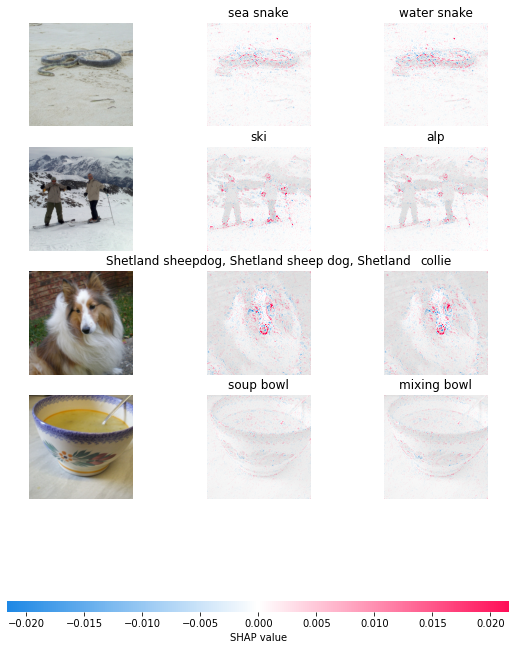

In [8]:
index_names = [[ilsvrc.id_to_desc[pred_id.item()] for pred_id in row] for row in indexes]
shap.image_plot(shap_values, to_np(to_explain), index_names)